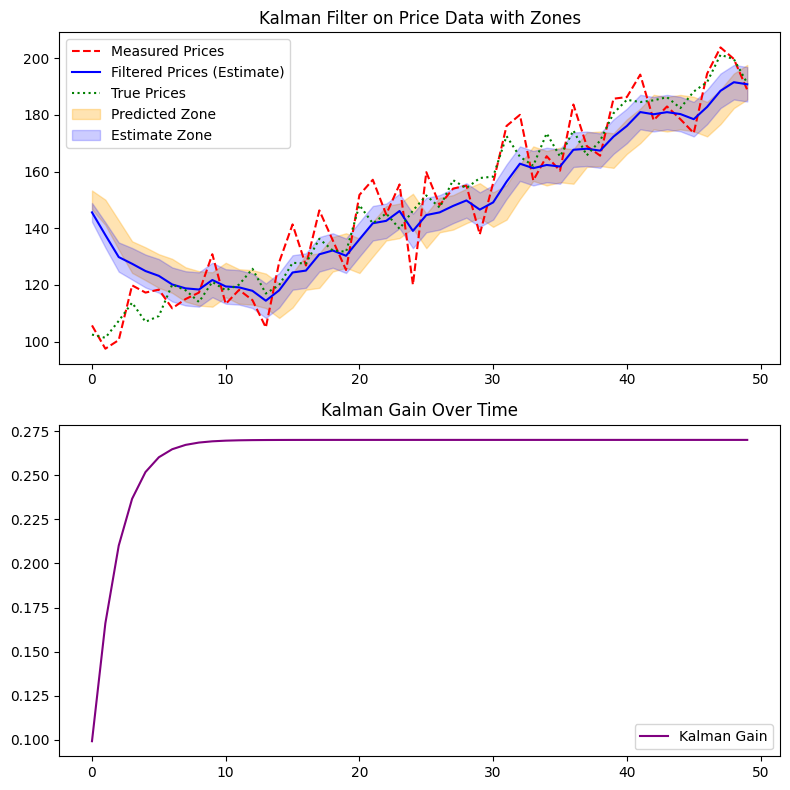

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Example data setup (Ensure these variables are defined in your environment)
np.random.seed(42)
true_prices = np.linspace(100, 200, 50) + np.random.normal(0, 5, 50)  # True prices with noise
measured_prices = true_prices + np.random.normal(0, 10, 50)  # Noisy measurements

measurement_variance = 100  # Assumed measurement noise
process_variance = 10      # Assumed process noise

prev_state = 150  # Initial guess of the price
prev_covariance = 1  # Initial uncertainty

filtered_prices = []
kalman_gains = []
predicted_prices = []
predicted_covariances = []

for price in measured_prices:
    # Prediction step (state does not change)
    predicted_state = prev_state
    predicted_covariance = prev_covariance + process_variance

    predicted_prices.append(predicted_state)
    predicted_covariances.append(predicted_covariance)

    # Kalman filter update
    kalman_gain = predicted_covariance / (predicted_covariance + measurement_variance)
    updated_state = predicted_state + kalman_gain * (price - predicted_state)
    prev_state = updated_state
    prev_covariance = (1 - kalman_gain) * predicted_covariance

    filtered_prices.append(updated_state)
    kalman_gains.append(kalman_gain)

# Calculate the upper and lower bounds for the zones
predicted_upper = np.array(predicted_prices) + np.sqrt(np.array(predicted_covariances))
predicted_lower = np.array(predicted_prices) - np.sqrt(np.array(predicted_covariances))

estimate_upper = np.array(filtered_prices) + np.sqrt(np.array(predicted_covariances))
estimate_lower = np.array(filtered_prices) - np.sqrt(np.array(predicted_covariances))

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot measured prices, filtered prices, and true prices
axs[0].plot(measured_prices, label='Measured Prices', color='r', linestyle='dashed')
axs[0].plot(filtered_prices, label='Filtered Prices (Estimate)', color='b')
axs[0].plot(true_prices, label='True Prices', color='g', linestyle=':')
axs[0].fill_between(range(len(measured_prices)), predicted_lower, predicted_upper, color='orange', alpha=0.3, label="Predicted Zone")
axs[0].fill_between(range(len(measured_prices)), estimate_lower, estimate_upper, color='blue', alpha=0.2, label="Estimate Zone")
axs[0].set_title("Kalman Filter on Price Data with Zones")
axs[0].legend()

# Plot Kalman Gain
axs[1].plot(kalman_gains, label='Kalman Gain', color='purple')
axs[1].set_title("Kalman Gain Over Time")
axs[1].legend()

plt.tight_layout()
plt.show()



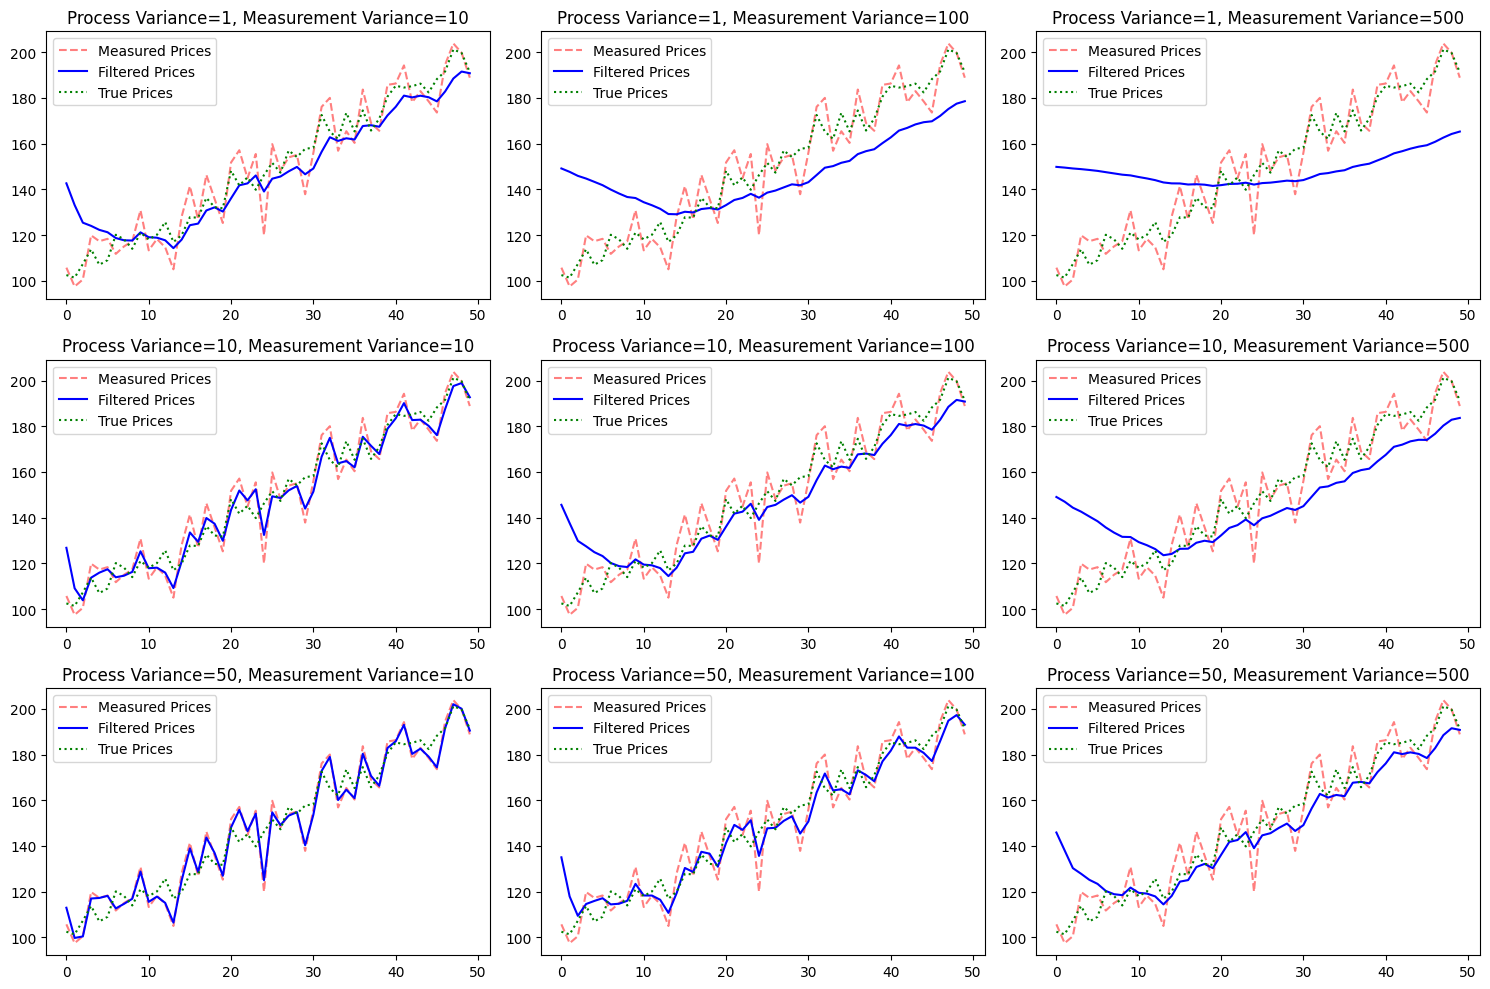

In [2]:
# Define different values for process_variance and measurement_variance
process_variances = [1, 10, 50]  # Lower process variance means the filter trusts the model more
measurement_variances = [10, 100, 500]  # Lower measurement variance means the filter trusts observations more

fig, axs = plt.subplots(len(process_variances), len(measurement_variances), figsize=(15, 10))

# Loop through different variances and apply the Kalman filter
for i, process_variance in enumerate(process_variances):
    for j, measurement_variance in enumerate(measurement_variances):
        prev_state = 150  # Initial guess
        prev_covariance = 1  # Initial uncertainty
        filtered_prices = []

        for price in measured_prices:
            predicted_state = prev_state
            predicted_covariance = prev_covariance + process_variance

            kalman_gain = predicted_covariance / (predicted_covariance + measurement_variance)
            updated_state = predicted_state + kalman_gain * (price - predicted_state)
            prev_state = updated_state
            prev_covariance = (1 - kalman_gain) * predicted_covariance

            filtered_prices.append(updated_state)

        # Plot results
        axs[i, j].plot(measured_prices, label='Measured Prices', color='r', linestyle='dashed', alpha=0.5)
        axs[i, j].plot(filtered_prices, label='Filtered Prices', color='b')
        axs[i, j].plot(true_prices, label='True Prices', color='g', linestyle=':')
        axs[i, j].set_title(f'Process Variance={process_variance}, Measurement Variance={measurement_variance}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


/opt/anaconda3/envs/quant/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/envs/quant/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/envs/quant/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


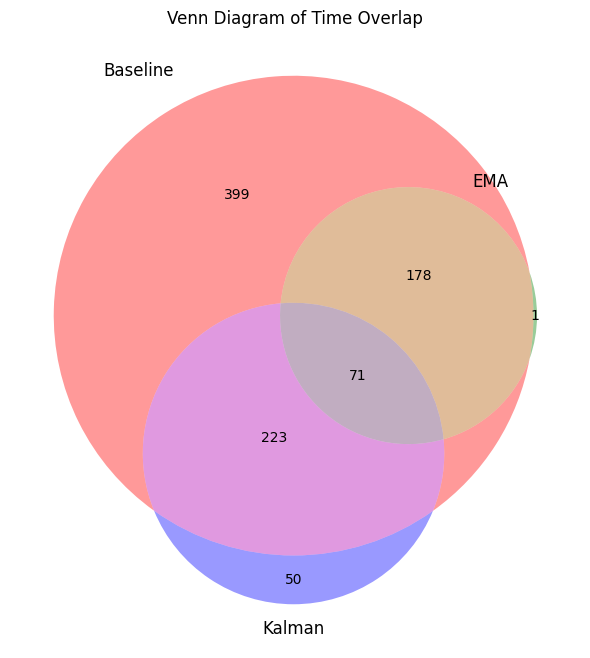

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
df1 = pd.read_excel("baseline.xlsx", skiprows=1805)
df2 = pd.read_excel("ma.xlsx", skiprows =563 )
df3 = pd.read_excel("kalman.xlsx",skiprows = 751)
df1 = df1[['Time']][1:-1]
df1 = df1[df1.index % 2 == 0]  # Filter for rows with odd indices
df2 = df2[['Time']][1:-1]
df2 = df2[df2.index % 2 == 0]
df3 = df3[['Time']][1:-1]
df3 = df3[df3.index % 2 == 0]

# Convert "Time" columns to datetime
df1['Time'] = pd.to_datetime(df1['Time'])
df2['Time'] = pd.to_datetime(df2['Time'])
df3['Time'] = pd.to_datetime(df3['Time'])

# Find intersections
set1 = set(df1['Time'])
set2 = set(df2['Time'])
set3 = set(df3['Time'])

# Create the Venn diagram
venn_labels = {
    '100': len(set1 - set2 - set3),  # Only in df1
    '010': len(set2 - set1 - set3),  # Only in df2
    '001': len(set3 - set1 - set2),  # Only in df3
    '110': len(set1 & set2 - set3),  # In df1 and df2
    '011': len(set2 & set3 - set1),  # In df2 and df3
    '101': len(set1 & set3 - set2),  # In df1 and df3
    '111': len(set1 & set2 & set3)   # In all three
}

# Plot the Venn diagram
plt.figure(figsize=(8, 8))
venn3(subsets=venn_labels, set_labels=('Baseline', 'EMA', 'Kalman'))
plt.title("Venn Diagram of Time Overlap")
plt.show()
